In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
print ('Import Complete')

Import Complete


In [2]:
df = pd.read_csv('/Users/ilaakshmishra/Documents/Machine_Learning/Assigntment3/housing.csv')
print ('Read Complete')

Read Complete


In [4]:
df.shape

(20640, 10)

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns.drop('longitude', 'latitute')

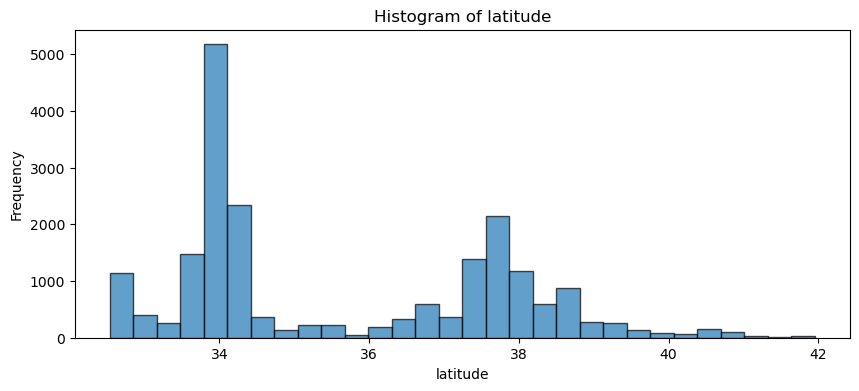

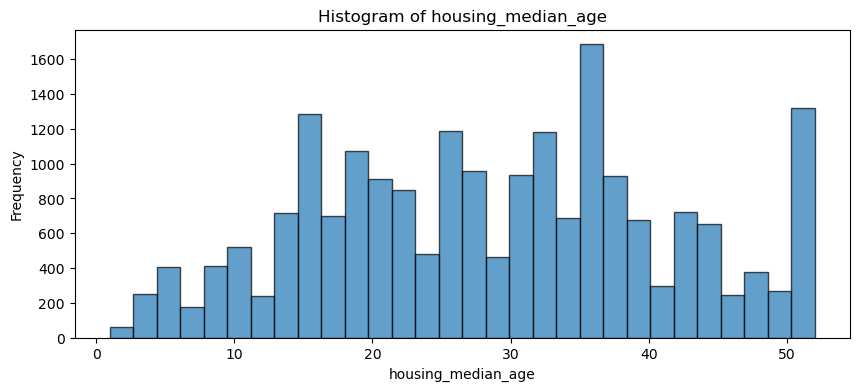

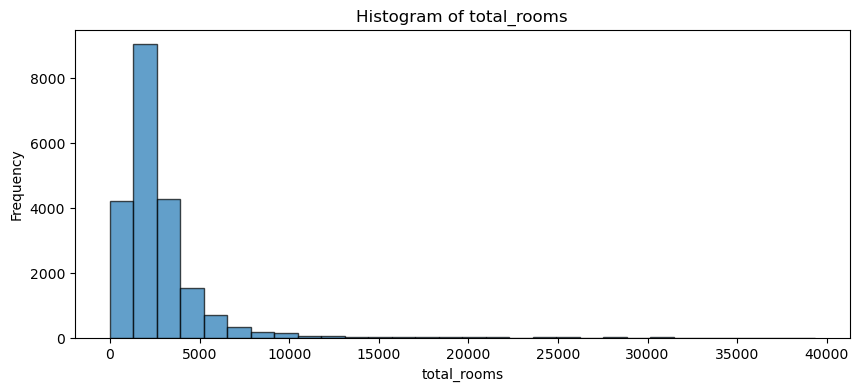

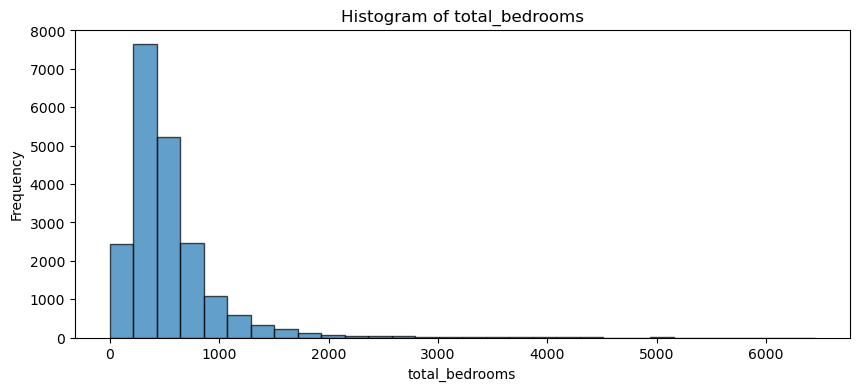

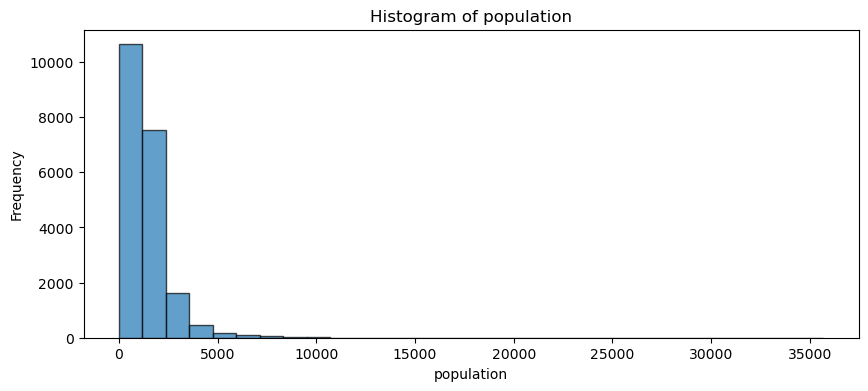

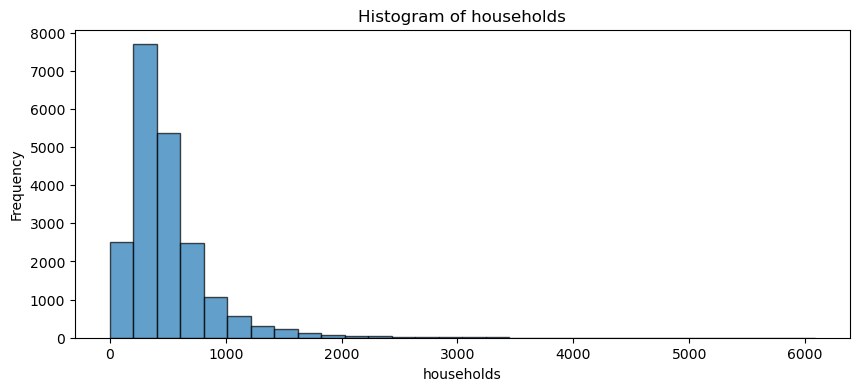

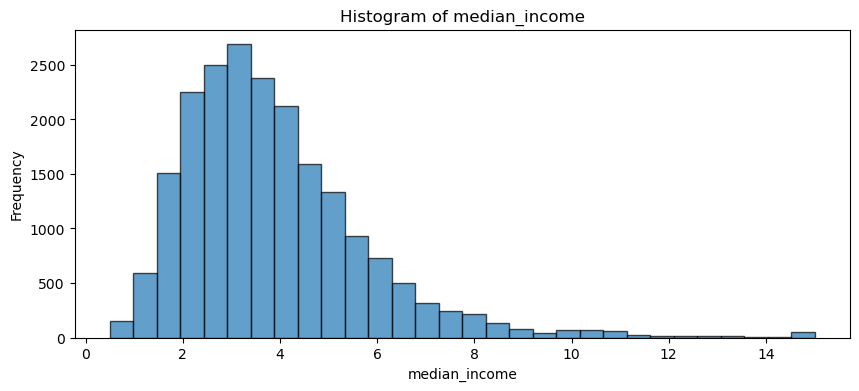

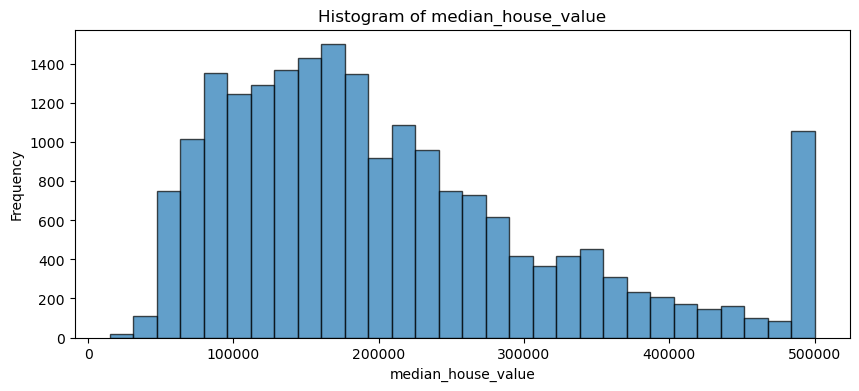

In [19]:
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.hist(df[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


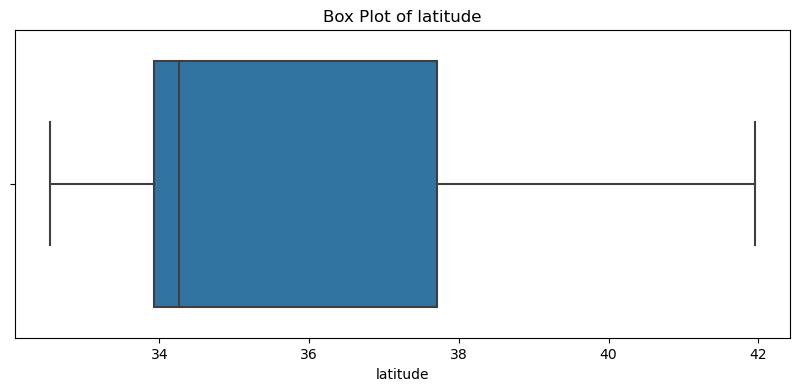

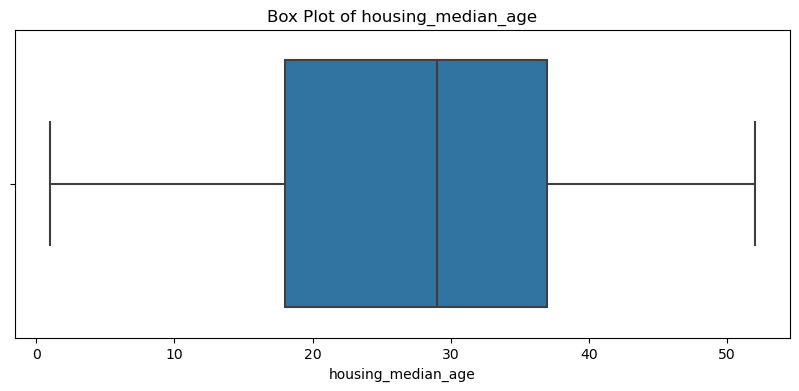

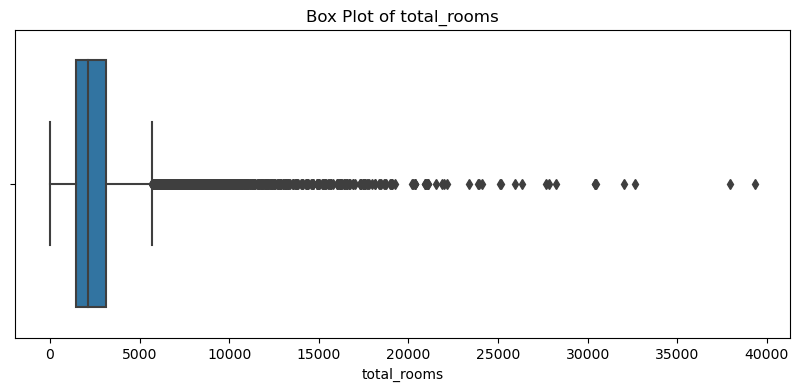

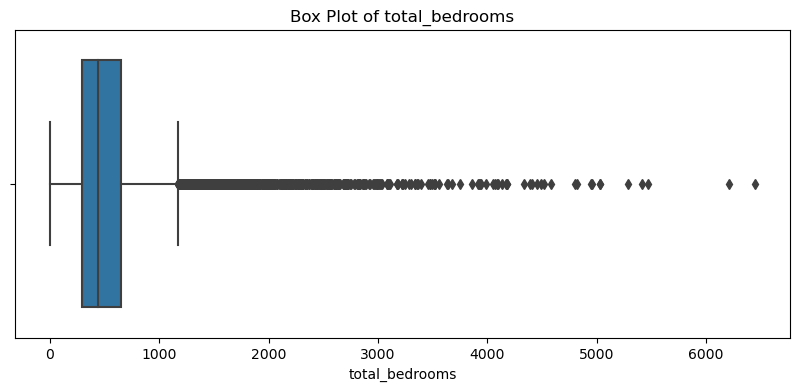

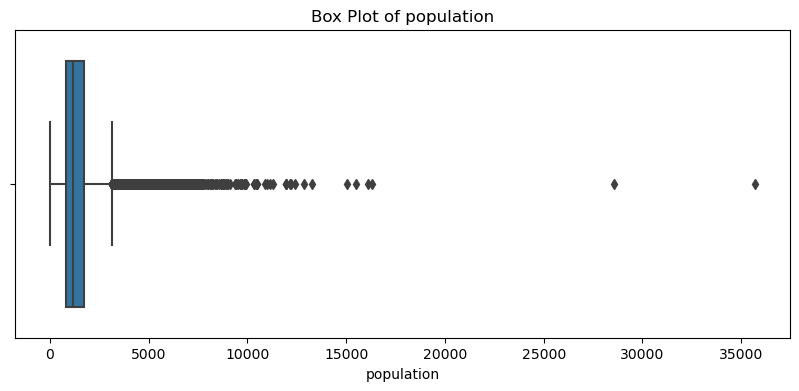

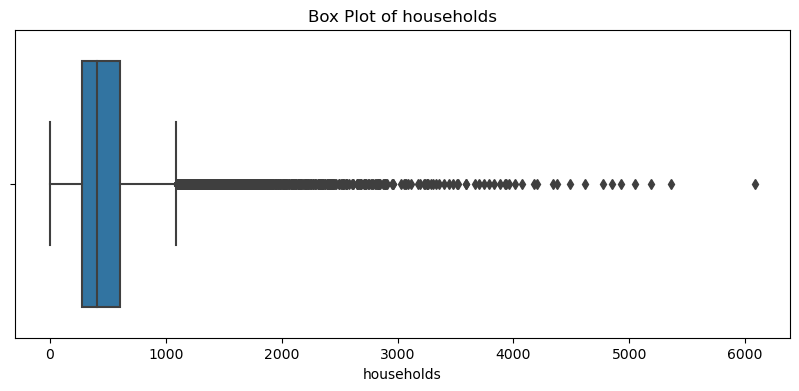

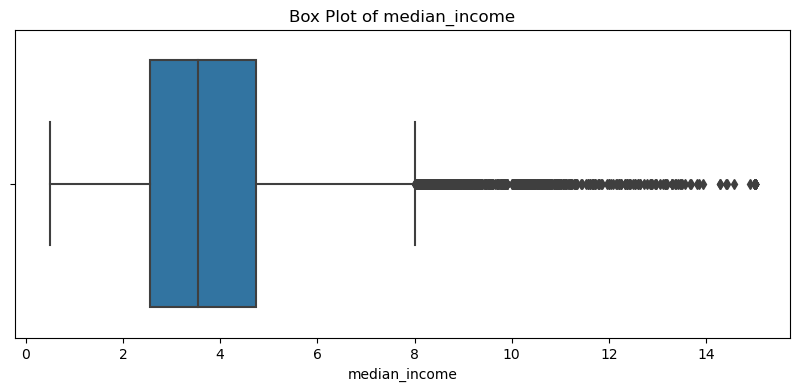

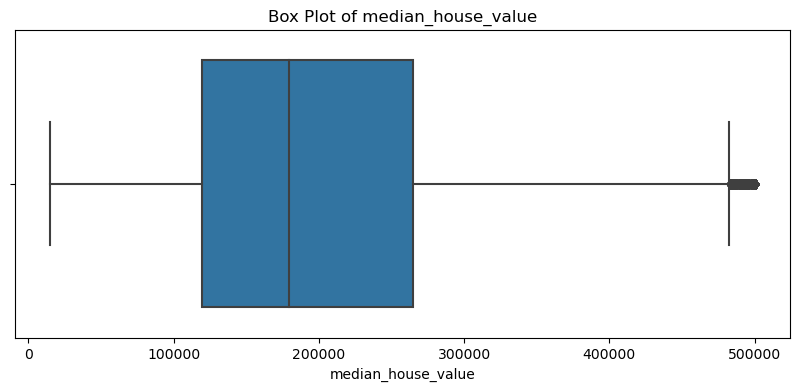

In [22]:
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [24]:
correlation_matrix = df.corr()

/var/folders/lg/n9yypr650dngfkplkgws2qyc0000gn/T/ipykernel_56539/4214245630.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


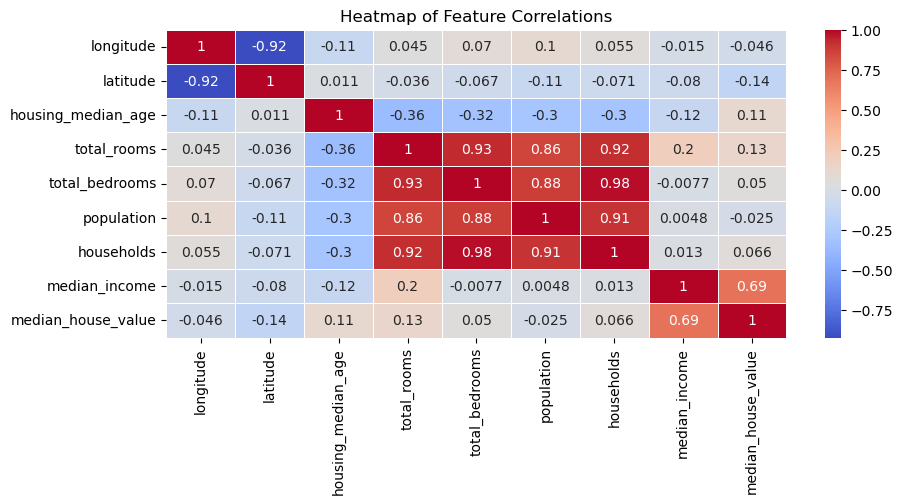

In [25]:
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [26]:
ocean_proximity_count = df['ocean_proximity'].value_counts()

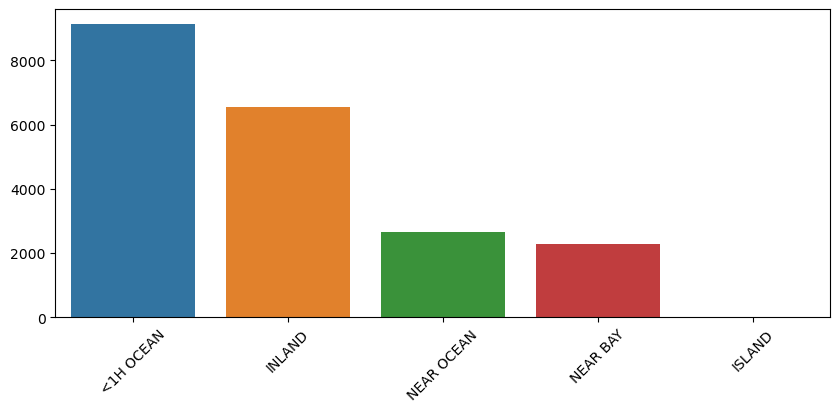

In [27]:
plt.figure(figsize=(10,4))
sns.barplot(x = ocean_proximity_count.index, y= ocean_proximity_count.values)
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better readability
plt.show()

In [28]:
nan_values = df.isna().sum()

In [29]:
print(nan_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [30]:
medians = df.median()

data_imputed = df.fillna(medians)

nan_values_after_imputation = data_imputed.isna().sum()
print("Count of NaN values in each column after imputation:")
print(nan_values_after_imputation)

Count of NaN values in each column after imputation:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/var/folders/lg/n9yypr650dngfkplkgws2qyc0000gn/T/ipykernel_56539/1001864996.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  medians = df.median()


In [31]:
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    data = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

print("Data after removing outliers:")
print(data)

Data after removing outliers:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [34]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [41]:
# Initialize Label Encoder
le = LabelEncoder()

# Encode 'ocean_proximity'
data['ocean_proximity_encoded'] = le.fit_transform(data['ocean_proximity'])

# Display the first few rows of the dataset
print(data[['ocean_proximity', 'ocean_proximity_encoded']].head())


  ocean_proximity  ocean_proximity_encoded
0        NEAR BAY                        3
1        NEAR BAY                        3
2        NEAR BAY                        3
3        NEAR BAY                        3
4        NEAR BAY                        3


/var/folders/lg/n9yypr650dngfkplkgws2qyc0000gn/T/ipykernel_56539/2764023329.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ocean_proximity_encoded'] = le.fit_transform(data['ocean_proximity'])


In [43]:
ohe = OneHotEncoder(sparse=False)
ocean_proximity_ohe = ohe.fit_transform(df[['ocean_proximity']])
ocean_proximity_df = pd.DataFrame(ocean_proximity_ohe, columns=ohe.get_feature_names_out(['ocean_proximity']))
data_encoded = pd.concat([data, ocean_proximity_df], axis=1)
print(data_encoded.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_encoded  ocean_proximity_0  ocean_proximity_1  \


/Users/ilaakshmishra/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [44]:
target = data['median_house_value']

# Drop the 'median_house_value' column from the DataFrame
data = df.drop('median_house_value', axis=1)

# Check the new shape of the DataFrame
print("New shape of the DataFrame:", data.shape)

New shape of the DataFrame: (20640, 10)


In [45]:
target = df['median_house_value']  # Assuming this is your target variable
data = df.drop('median_house_value', axis=1)  # Drop the target from the features

In [48]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
# Check the size of each set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (16512, 10)
X_test shape: (4128, 10)
y_train shape: (16512,)
y_test shape: (4128,)


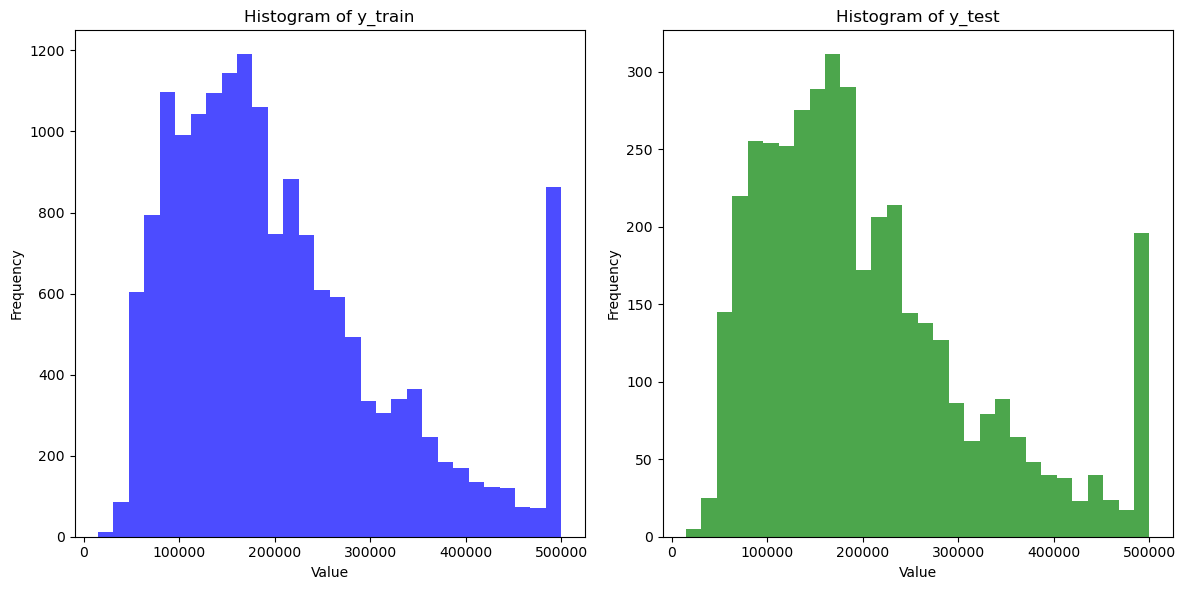

In [49]:
# Assuming y_train and y_test are already defined
# Plot the histograms
plt.figure(figsize=(12, 6))

# Histogram for y_train
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(y_train, bins=30, alpha=0.7, color='blue')
plt.title('Histogram of y_train')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Histogram for y_test
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(y_test, bins=30, alpha=0.7, color='green')
plt.title('Histogram of y_test')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()